In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('/content/drive/MyDrive/linear_regression_train.csv')
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
0,1,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
1,2,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
2,3,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
3,4,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
4,5,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,47996,3.562959,11.486509,61.145800,2.805889,-28.902789,-30.775352,-66.414021,-103.186976,-130.046256,...,-105.482960,48.452228,-0.643498,-1.883623,-80.008729,-27.849186,-92.497409,-69.854208,47.798525,3353.082152
47996,47997,-2.748224,22.360721,124.499793,-21.230197,-60.030819,-27.661729,-60.773068,-102.180412,-140.769031,...,-101.472074,-36.467914,7.985939,-30.925713,-134.529393,5.100088,-87.846292,-21.788868,9.368803,2149.681236
47997,47998,13.876292,26.976793,86.952262,-70.016487,-10.544583,-71.143920,-138.125870,-97.217351,-92.475987,...,-134.999520,4.757532,16.897211,-20.287205,-100.728629,-48.036962,-102.180933,-63.056645,109.054688,-1703.219366
47998,47999,-4.422768,19.522277,61.596420,-23.721260,-24.057237,-28.699059,-14.257085,-112.711818,-56.741174,...,-32.319919,-45.396834,-9.835818,-28.323818,-63.691619,-19.455079,-85.611697,2.956711,4.267729,4551.706842


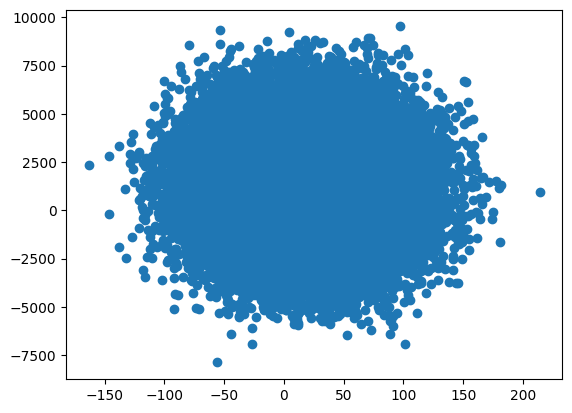

In [3]:
plt.scatter(data.Feature_25,data.Target)

In [4]:
data_arr=np.array(data)
X=data_arr[:,1:-1]
Y=data_arr[:,-1][:,np.newaxis]
X.shape,Y.shape

((48000, 25), (48000, 1))

In [5]:
Y = Y.reshape(-1)
Y.shape

(48000,)

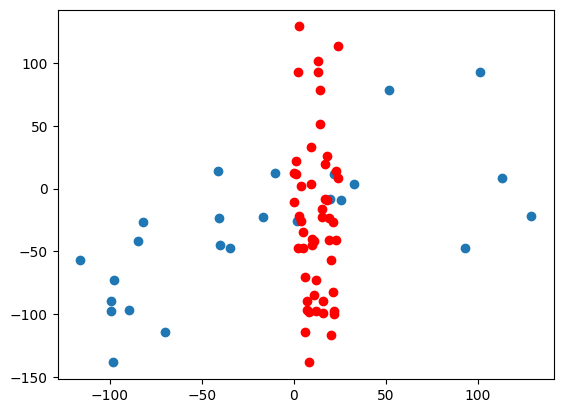

In [6]:
plt.plot(X[0], 'or')
plt.plot(X[1], 'or')

plt.scatter(X[0],X[1])

In [7]:
m=X.shape[0]
m

48000

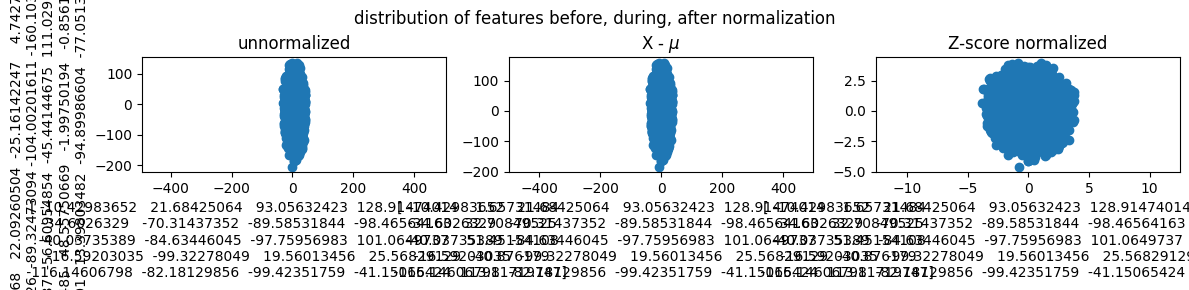

In [8]:
mu     = np.mean(X,axis=0)
sigma  = np.std(X,axis=0)
X_mean = (X - mu)
X_norm = (X - mu)/sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X[:,0], X[:,3])
ax[0].set_xlabel(X[0]); ax[0].set_ylabel(X[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X[0]); ax[0].set_ylabel(X[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X[0]); ax[0].set_ylabel(X[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [9]:
print(X_norm.shape)

(48000, 25)


In [10]:
X_norm

array([[-1.69864257,  0.25314326,  1.13869653, ..., -0.22286562,
        -0.47196937,  2.27252813],
       [ 0.67201663, -1.49897152, -2.0985691 , ...,  0.15226832,
         0.88583556, -0.21087511],
       [ 0.17740114,  0.78499939,  0.00481211, ..., -0.53771862,
        -0.41626433,  0.40224792],
       ...,
       [ 0.81704195,  1.17747749,  0.99823079, ..., -0.82105666,
        -1.01309748,  2.17589655],
       [-1.07691097, -0.1244421 ,  0.41474601, ...,  2.77345726,
         0.61758348, -0.31658482],
       [-0.21901717, -0.87546677, -2.26766168, ...,  0.228205  ,
        -2.83281419,  0.46684529]])

In [11]:
def model (x,y,learning_rate,iteration):
  m=x.shape[0]

  cost_list = []
  w_init=np.random.randn(x.shape[1])
  b_init=0.5

  for i in range(iteration):
        # Predict
        y_pred = np.dot(x, w_init) + b_init

        # Calculate cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))
        cost_list.append(cost)

        # Calculate gradients
        d_w = (1 / m) * np.dot(x.T, (y_pred - y))
        d_b = (1 / m) * np.sum((y_pred - y))

        # Update weights and bias
        w_init = w_init - learning_rate * d_w
        b_init = b_init - learning_rate * d_b

        if(i%(iteration/10)==0):
            print("Cost is :", cost)
            print("y_pred is :",y_pred)

  return w_init,b_init,cost_list,y_pred

In [12]:
iteration = 1000
learning_rate = 0.05
w_init,b_init,cost_list,y_pred = model(X_norm,Y,learning_rate= learning_rate,iteration = iteration)


Cost is : 3101066.9766764925
y_pred is : [ 0.35249996  3.92335335 -6.56505223 ...  2.15866857  1.39277141
  1.8117639 ]
Cost is : 58142.616413499694
y_pred is : [ 4815.28390044 -1065.8032999  -1069.77034194 ... -1497.38777988
  4396.01337851 -2866.74067555]
Cost is : 58027.40474386958
y_pred is : [ 4843.610622   -1070.67062832 -1075.51403553 ... -1506.87011316
  4423.4878665  -2882.62441786]
Cost is : 58027.40024496215
y_pred is : [ 4843.77856043 -1070.69089817 -1075.54794381 ... -1506.93103191
  4423.66199983 -2882.71369589]
Cost is : 58027.40024478139
y_pred is : [ 4843.77956266 -1070.69096627 -1075.54816216 ... -1506.93142967
  4423.66311824 -2882.71420428]
Cost is : 58027.400244781384
y_pred is : [ 4843.77956868 -1070.69096635 -1075.54816366 ... -1506.93143231
  4423.66312552 -2882.71420721]
Cost is : 58027.40024478139
y_pred is : [ 4843.77956871 -1070.69096634 -1075.54816368 ... -1506.93143232
  4423.66312557 -2882.71420722]
Cost is : 58027.40024478139
y_pred is : [ 4843.77956871 

In [13]:
def plot(cost,i_list):
    plt.plot(i_list,cost,c="r",label="cost")
    plt.xlabel(f"iteration")
    plt.ylabel("cost")
    plt.legend()
    plt.show()

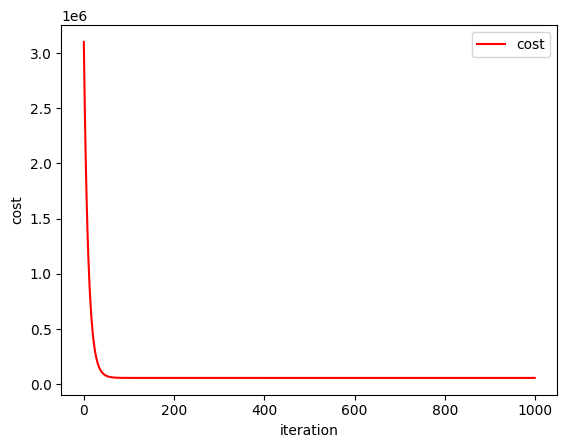

In [24]:
plot(cost_list,np.arange(iteration))

In [14]:
print('Train Accuracy:', {(1-(np.sum((y_pred-Y)**2)/np.sum((np.mean(Y)-Y)**2))) * 100})      #R_2 score

Train Accuracy: {97.50502696534518}


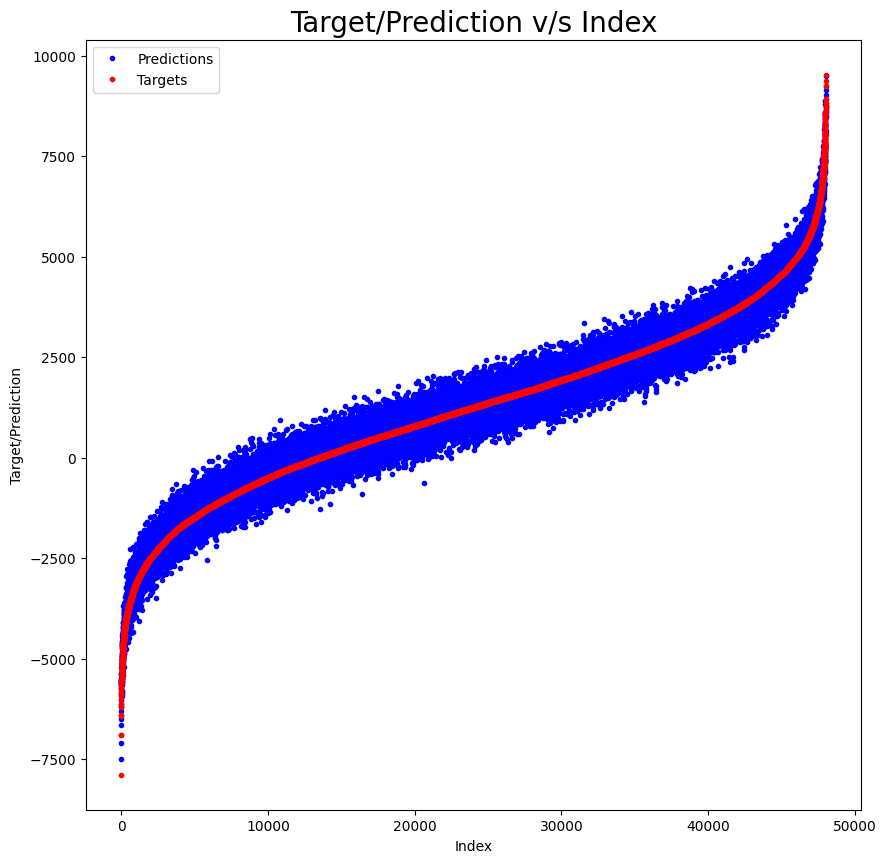

In [15]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(Y)
ysort = Y[sorted_indices]
yhatsort = y_pred[sorted_indices]

plt.plot(data.iloc[:, 0], yhatsort, '.', color = 'b', label = 'Predictions')
plt.plot(data.iloc[:, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

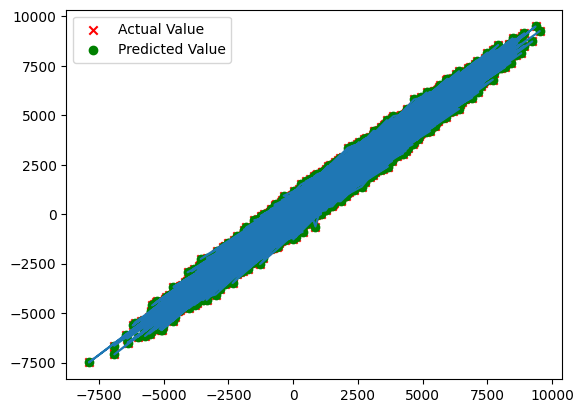

In [16]:
plt.scatter(Y,y_pred,marker='x',c ='red',label="Actual Value")
plt.scatter(Y,y_pred,marker='o',c ='green',label="Predicted Value")
plt.plot(Y,y_pred)
plt.legend()
plt.show()

In [17]:
test = pd.read_csv('/content/drive/MyDrive/linear_regression_test.csv')
test

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,1,-13.296650,26.947913,95.977811,-25.167831,-25.863389,-46.432548,-30.120148,-99.220569,-95.771730,...,-46.275616,-36.211021,46.588536,-1.146567,-55.504215,-70.993172,-13.516826,-93.085585,-10.310519,-47.579967
1,2,13.740478,26.632355,-1.056834,113.386950,-26.957189,-40.305571,-8.916968,-99.182781,-65.653323,...,-53.961100,-27.153987,-20.942724,-5.648802,-27.809076,-151.023959,-37.020808,-99.351817,7.806000,75.691539
2,3,5.757701,5.729282,-7.846318,9.063737,-54.522411,-17.102457,-89.391519,-81.827183,-104.007163,...,-31.822475,-89.093319,-9.672241,15.562814,-13.848764,-79.762693,-59.360365,-104.771868,-29.851237,71.920184
3,4,-0.365463,26.040174,15.941714,-47.019942,-32.029202,-34.080470,-105.277503,-104.742190,-135.598491,...,-6.004513,-59.862724,16.676153,-14.092968,-30.554072,-86.409042,26.117858,-97.644419,-57.080490,3.592127
4,5,-7.076549,13.958214,52.805040,-41.259861,-22.072337,-42.073960,-42.290671,-91.763629,-18.252699,...,-38.963648,-42.747877,-10.722687,18.179473,-39.178435,-149.742179,-36.540063,-105.068864,-63.126882,41.053917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2.516790,13.198787,45.411326,-25.343444,-33.343441,-40.083697,-110.249581,-102.404209,-126.102213,...,-59.580992,-66.406066,-0.855422,-18.401377,-17.193749,-107.855552,6.542541,-97.337171,-59.221753,8.133988
11996,11997,6.971171,13.222694,88.455841,44.794110,-24.514454,-85.863918,-82.079235,-90.597125,-102.581859,...,-5.862443,-5.911085,1.830188,-4.416752,-47.964535,-112.116174,-41.919028,-98.893351,-37.260179,4.170628
11997,11998,-5.852616,12.037219,44.810335,9.092964,-28.861756,-24.442797,-102.642309,-88.214928,-52.269598,...,-2.694783,-28.743572,-35.723921,7.343820,-18.417126,-96.405529,-29.875688,-109.654456,18.413359,-6.979554
11998,11999,20.431793,3.025714,104.605949,-43.093887,-42.184472,-58.059142,-127.818023,-93.167693,-136.659290,...,-22.306799,-64.900975,-46.297870,10.503240,-40.309868,-125.745717,-18.091256,-99.048171,-58.060220,8.325778


In [18]:
test_arr = np.array(test)
X_test = test_arr[:,1:]
X_test

array([[ -13.29664984,   26.94791326,   95.97781082, ...,  -93.08558458,
         -10.31051873,  -47.57996745],
       [  13.74047822,   26.6323546 ,   -1.05683434, ...,  -99.35181737,
           7.80600033,   75.69153932],
       [   5.75770087,    5.72928201,   -7.84631752, ..., -104.77186847,
         -29.85123744,   71.92018423],
       ...,
       [  -5.85261615,   12.03721863,   44.8103347 , ..., -109.65445576,
          18.41335887,   -6.97955382],
       [  20.43179344,    3.02571363,  104.60594893, ...,  -99.04817113,
         -58.06021961,    8.32577778],
       [   4.48130396,   27.63513075,   45.58004581, ...,  -97.28312767,
         -22.5433931 ,   -4.87210286]])

In [19]:
w_init

array([ 1.30450010e+02,  6.30887594e-01,  5.22752875e+02,  7.35341443e+02,
       -4.23493989e-01,  8.11285219e+02,  4.42198532e+02, -1.00613919e+00,
        6.47193384e+02,  2.25168305e+02,  7.86963175e-01,  2.90427126e-01,
        7.62095443e+02,  6.62220237e+02, -1.41987881e+00,  5.27387257e+02,
        3.16658716e+01,  4.52260766e+02,  4.12490636e+02,  6.94742158e+02,
        9.67826403e+01,  1.15877636e+00,  1.05488175e+02,  4.92027124e+02,
        8.04727134e-01])

In [20]:
b_init

1246.9787453781526

In [21]:
mu_test     = np.mean(X_test,axis=0)
sigma_test  = np.std(X_test,axis=0)
X_mean_test = (X_test - mu_test)
X_norm_test = (X_test - mu_test)/sigma_test
X_norm_test

array([[-1.97837849e+00,  1.18957879e+00,  1.21509022e+00, ...,
         1.14979205e+00,  2.96607097e-01, -1.54140275e+00],
       [ 8.00824125e-01,  1.13374290e+00, -1.02510343e+00, ...,
        -1.91574770e-01,  7.39848321e-01,  1.38577932e+00],
       [-1.97421590e-02, -2.56490950e+00, -1.18184907e+00, ...,
        -1.35180564e+00, -1.81478789e-01,  1.29622543e+00],
       ...,
       [-1.21319079e+00, -1.44876427e+00,  3.38105347e-02, ...,
        -2.39698554e+00,  9.99369401e-01, -5.77312948e-01],
       [ 1.48863833e+00, -3.04328701e+00,  1.41428403e+00, ...,
        -1.26575430e-01, -8.71643590e-01, -2.13875416e-01],
       [-1.50945651e-01,  1.31117712e+00,  5.15804967e-02, ...,
         2.51254572e-01, -2.68407364e-03, -5.27269813e-01]])

In [22]:
for i in range(X_norm_test.shape[0]):
  y_test = np.dot(X_norm_test[i],w_init)+b_init
  print(y_test)

Streaming output truncated to the last 5000 lines.
-209.05924888393952
4518.7989758684
114.43839335838925
2255.318703304046
4142.916823009144
-1348.3256490674728
-1198.6360555566082
-2312.145456618313
3780.621293870423
4163.459961177651
1519.5284761058756
1527.2338910671285
-213.41428957936887
2296.7527903204514
1028.503388096461
-802.9529966319694
4030.54311081738
3347.9872672410966
-721.5049249972494
5727.412851740895
2465.8787522451476
1970.0708134078575
2826.1587778358835
-3425.517469434225
4846.214505722898
370.69460876243215
4368.698082748411
-198.2993064696352
-1406.6618301680471
3025.814972608469
2744.4034888795286
2035.6576772659541
3481.4280826210743
249.2999348556142
-749.4184354219274
4044.6980369097155
3673.210933212192
-22.96408009087645
1658.637947724824
-1953.5983987524135
1355.6985393404962
2025.5442883033847
-240.0246856646279
1094.268092807402
-1846.3659988312431
1614.3398850499293
-3364.1303717332903
802.6065720154807
1708.2210268454178
1210.693981685826
-725.668226